# **Importing All Necessary Libraries**

In [90]:
import pandas as pd
import numpy as np
from scipy.stats import triang
from google.colab import drive
import logging
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

# **File Path Configuration**

In [91]:
file_path = '/content/drive/MyDrive/DF_Data.xlsx'
num_of_simulations = 10000

# **Data Loading**

In [92]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
def load_data(file_path):
    try:
        print(f"Data loading.............\n\n\n")
        df = pd.read_excel(file_path)
        return df
    except Exception as e:
        print(f"Error loading data from {file_path}: {e}")
        return None

In [94]:
df = load_data(file_path)
# Show data head to check if data is read correctly
df.head()

Data loading.............





,Check box if it is a Risk.,Row ID,Risk Category,Short Tile,Definition (What is the Risk?),What is the Cause?,What is the Impact?,Mitigation Plan,Risk Review Comments,Risk Owner (Responsible),...,Severity,Priority,Cost Impact Score,Budget Impact,Cost Impact Matrix 1,Cost Impact Matrix 2,Date of Resolution,Progress Update,Progress Updated Tracking,Date Closed
0,NaN,SD001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,1-1,10000.0,NaN,NaN,2024-05-08 16:54:27,NaN
1,NaN,SD002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,1-2,30000.0,NaN,NaN,2024-05-08 16:54:27,NaN
2,NaN,SD003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,1-3,50000.0,NaN,NaN,2024-05-08 16:54:27,NaN
3,NaN,SD004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,1-4,100000.0,NaN,NaN,2024-05-08 16:54:27,NaN
4,NaN,SD005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,1-5,200000.0,NaN,NaN,2024-05-08 16:54:27,NaN


In [95]:
# Check data shape
df.shape

(90, 23)

In [96]:
# Check null values
df.isnull().sum()

Check box if it is a Risk.        90
Row ID                             0
Risk Category                     25
Short Tile                        25
Definition (What is the Risk?)    27
What is the Cause?                35
What is the Impact?               34
Mitigation Plan                   40
Risk Review Comments              42
Risk Owner (Responsible)          30
Status                             0
Probability [1-Low/5 Certain]     54
Impact [1-Low/5 Critical]         54
Severity                           0
Priority                          55
Cost Impact Score                 54
Budget Impact                     30
Cost Impact Matrix 1              65
Cost Impact Matrix 2              65
Date of Resolution                90
Progress Update                   90
Progress Updated Tracking          0
Date Closed                       90
dtype: int64

In [97]:
# Check null values in 'Cost Impact Score' column to drop those
df['Cost Impact Score'].isnull().sum().sum()

54

In [98]:
def plot_correlation_heatmap(df):
  try:
      numeric_df = df.select_dtypes(include=[np.number])
      plt.figure(figsize=(12, 8))
      sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
      plt.title('Correlation Heatmap')
      plt.show()
  except Exception as e:
      print(f"Error plotting heatmap: {e}")

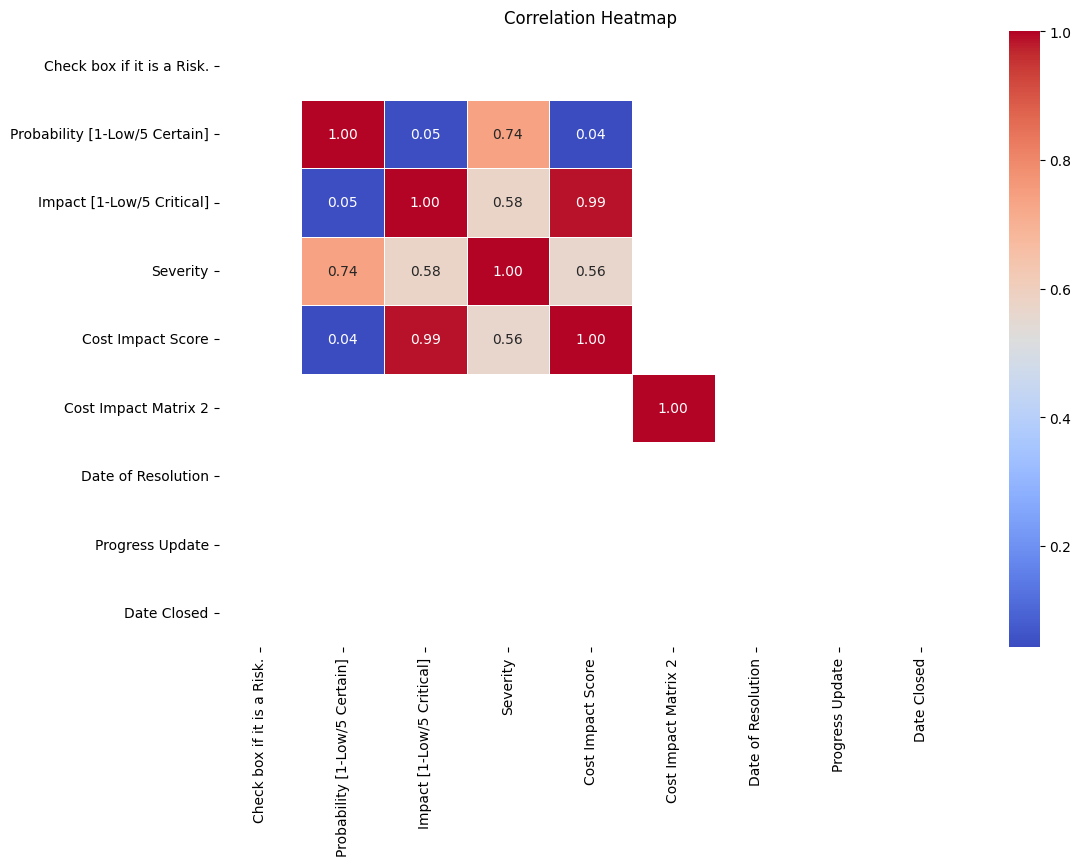

In [99]:
if not df.empty:
  plot_correlation_heatmap(df)
else:
  print("No valid data for further plotting")

In [100]:
def plot_risk_analysis(df):
    try:
        # Plot the distribution of risks by category
        plt.figure(figsize=(10, 6))
        ax = sns.histplot(data=df, x='Risk Category', multiple='stack', shrink=0.8, palette='viridis', edgecolor='.2')
        total_counts = df['Risk Category'].value_counts().to_dict()
        count_strings = [f"{category}: {count}" for category, count in total_counts.items()]
        title = f'Distribution of Risks by Category\n' + ', '.join(count_strings)
        plt.title(title)
        plt.xticks(rotation=45)
        plt.ylabel('Count')
        plt.show()
    except Exception as e:
        print(f"Error plotting risk analysis: {e}")

<ipython-input-100-b503303bbc3d>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=df, x='Risk Category', multiple='stack', shrink=0.8, palette='viridis', edgecolor='.2')


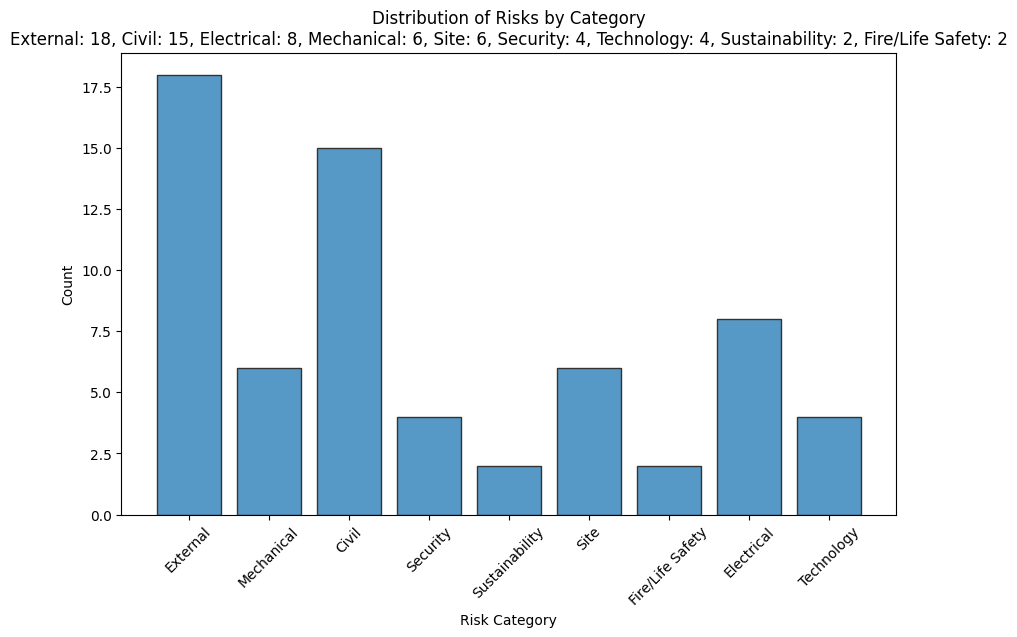

In [101]:
if not df.empty:
  plot_risk_analysis(df)
else:
  print("No valid data for further plotting")

# **Data Cleaning and Preprocessing**

In [102]:
def preprocess_data(df):
    try:
        # Data Cleaning and Preprocessing
        df['Cost Impact Score'] = pd.to_numeric(df['Cost Impact Score'], errors='coerce')
        df = df.dropna(subset=['Cost Impact Score'])

        # Calculate 'High', 'Likely', and 'Low' values to define the upper and lower possible bounds
        df['High'] = df['Cost Impact Score']
        df['Likely'] = df['High'] / 2
        df['Low'] = df['Likely'] / 2

        # Ensuring values are valid
        df = df[(df['Low'] > 0) & (df['Low'] <= df['Likely']) & (df['Likely'] <= df['High'])]

        if df.empty:
            print("No valid data after preprocessing")
        else:
            print("Data preprocessed successfully")
        return df

    except Exception as e:
        print(f"Error during preprocessing: {e}")
        return pd.DataFrame()

In [103]:
if df is not None and not df.empty:
  # Preprocess Data
  df = preprocess_data(df)
else:
  print("Data could not be loaded or is empty")

df.head()

Data preprocessed successfully


<ipython-input-102-c87366a1a4ef>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['High'] = df['Cost Impact Score']
<ipython-input-102-c87366a1a4ef>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Likely'] = df['High'] / 2
<ipython-input-102-c87366a1a4ef>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,Check box if it is a Risk.,Row ID,Risk Category,Short Tile,Definition (What is the Risk?),What is the Cause?,What is the Impact?,Mitigation Plan,Risk Review Comments,Risk Owner (Responsible),...,Budget Impact,Cost Impact Matrix 1,Cost Impact Matrix 2,Date of Resolution,Progress Update,Progress Updated Tracking,Date Closed,High,Likely,Low
25,NaN,SD0013,External,Police Interface - response system required,Implementing and maintaining a system that mee...,"If we have alarming at a classified level, thi...",Additional hardening can increase both the com...,Cost Savings suggestions: Implement AI-driven ...,"Classified storage onsite, Meeting on Monday t...",mhankewycz@m2hprotection.com,...,300000,NaN,NaN,NaN,NaN,2024-05-22 07:49:26,NaN,3.0,1.5,0.75
26,NaN,SD0014,External,Water Availability,Water availability given allowances for additi...,Utility capacity and planning for ACM site dev...,"Critical for cooling capacity, feed up to max ...","650K/day need, need to clarify with Utility - ...","According to ""available"" allowance on past his...",jamison.caldwell@smithgroup.com,...,300000,NaN,NaN,NaN,NaN,2024-05-22 07:49:26,NaN,3.0,1.5,0.75
28,NaN,SD0019,External,Natural Disaster: Dam Rupture,A prelimnary natural hazard review was perform...,Unmanaged dam rupture. 100 or 500 year floods...,25 year data was low risk for impact. 100 and...,"Reports from Dam from Army Corp of Engineers, ...",What about Motion tests for seismic?,mhankewycz@m2hprotection.com,...,60000,NaN,NaN,NaN,NaN,2024-05-22 07:49:26,NaN,2.0,1.0,0.50
29,NaN,SD00112,External,High Voltage (ITC) lines,High Voltage (ITC) lines can support up to 200...,Size of existing ITC overhead lines,ITC lines would need to be upgraded in the fut...,"LANL gave us worse case scenario, if ACM bring...",Only leaves 40 for ACM,andrew.varilone@smithgroup.com,...,10000,NaN,NaN,NaN,NaN,2024-05-22 07:49:26,NaN,1.0,0.5,0.25
30,NaN,SD00120,External,FAA - Height Restrictions,"Mechanical Room Heights limitations, lower fou...",There are building height restrictions in cert...,Mechanical Room Heights and Construction Crane...,- Ask for permit from FAA to be above 50' (Own...,"GM building appears high, elevation confirmed ...","chris.devick@smithgroup.com, jamison.caldwell@...",...,200000,NaN,NaN,NaN,NaN,2024-05-22 09:58:48,NaN,2.0,1.0,0.50


# **Analyzing Costs**

In [104]:
def simulate_cost_impacts(df, num_of_simulations=10000):
    print("Simulating cost impacts using the triangular distribution...")
    total_cost_impacts = np.zeros(num_of_simulations)
    try:
        for i in tqdm(range(num_of_simulations), desc="Simulating cost impacts"):
            random_factors = np.random.rand(len(df))
            # Calculating simulated costs using the triangular distribution
            simulated_costs = triang.ppf(random_factors,
                                         (df['Likely'] - df['Low']) / (df['High'] - df['Low']),
                                         loc=df['Low'],
                                         scale=df['High'] - df['Low'])
            total_cost_impacts[i] = simulated_costs.sum()
        return total_cost_impacts
    except Exception as e:
        print(f"Error during simulation: {e}")
        return np.zeros(0)

In [105]:
if not df.empty:
  # Simulate Cost Impacts
  total_cost_impacts = simulate_cost_impacts(df, num_of_simulations)
else:
  print("No valid data to process after preprocessing")

total_cost_impacts

Simulating cost impacts using the triangular distribution...


Simulating cost impacts: 100%|██████████| 10000/10000 [00:07<00:00, 1298.35it/s]


array([47.682867  , 49.81106237, 56.84823494, ..., 54.25382409,
       54.77377149, 54.68722438])

# **Percentile Calculation**

In [106]:
def calculate_percentiles(total_cost_impacts):
    try:
        p90 = np.percentile(total_cost_impacts, 90)
        p70 = np.percentile(total_cost_impacts, 70)
        p30 = np.percentile(total_cost_impacts, 30)
        return p90, p70, p30
    except Exception as e:
        print(f"Error calculating percentiles: {e}")
        return None, None, None

In [107]:
if total_cost_impacts.size > 0:
    # Calculate Percentiles
    p90, p70, p30 = calculate_percentiles(total_cost_impacts)
    if None not in (p90, p70, p30):
        print(f"P90 result: {p90}")
        print(f"P70 result: {p70}")
        print(f"P30 result: {p30}")
    else:
        print("Percentile calculation failed")
else:
    print("Simulation produced no valid results")

P90 result: 56.91672940954026
P70 result: 54.98123296678069
P30 result: 52.28317354054998


# **Plotting Functions**

In [108]:
def plot_cost_impacts(total_cost_impacts):
    try:
        plt.figure(figsize=(10, 6))
        plt.hist(total_cost_impacts, bins=30, density=True, alpha=0.7, color='b')
        plt.title('Simulated Cost Impacts Distribution')
        plt.xlabel('Total Cost Impact')
        plt.ylabel('Density')
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"Error plotting cost impacts: {e}")

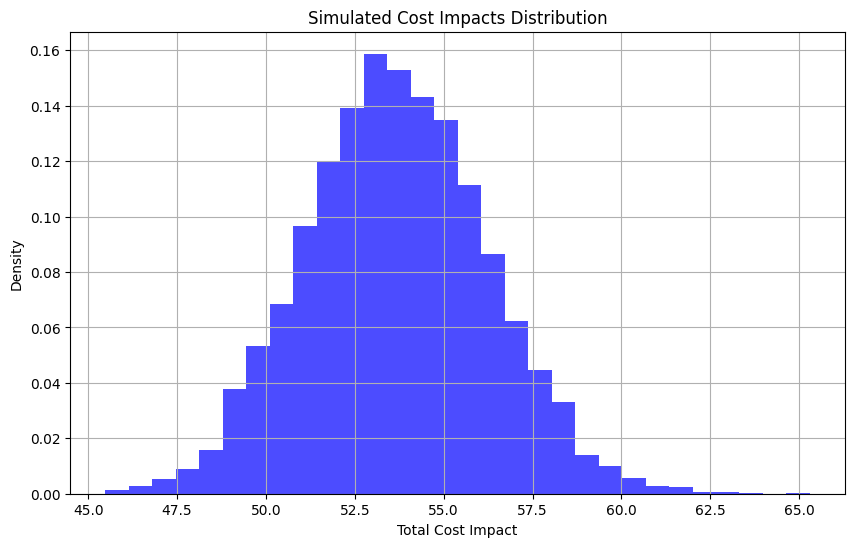

In [109]:
if total_cost_impacts.size > 0:
    plot_cost_impacts(total_cost_impacts)
else:
    print("Simulation produced no valid results for plotting")